# 2025-09-08 Newton Methods

* Newton's method via Taylor series

* Convergence theory for fixed point methods

* Derive Newton's method via convergence theory

* Newton methods in computing culture

* Breaking Newton's method

See also [FNC](https://tobydriscoll.net/fnc-julia/nonlineqn/newton.html)

## Bisection

In [1]:
using Plots
default(lw=4, ms=5, legendfontsize=12, xtickfontsize=12, ytickfontsize=12)

f(x) = cos(x) - x
hasroot(f, a, b) = f(a) * f(b) < 0
function bisect_iter(f, a, b, tol)
    hist = Float64[]
    while abs(b - a) > tol
        mid = (a + b) / 2
        push!(hist, mid)
        if hasroot(f, a, mid)
            b = mid
        else
            a = mid
        end
    end
    hist
end

bisect_iter (generic function with 1 method)

## Convergence classes

A convergent rootfinding algorithm procudes a sequence of approximations $x_k$ such that

$$ \lim_{k \rightarrow \infty} x_k \rightarrow x_* $$

where $f \left( x_* \right) = 0$.
For analysis, it is convenient to define the errors $e_k = x_k - x_*$. We say that an iterative algorithm is **$q$-linearly convergent** if

$$ \lim_{k \rightarrow \infty} \lvert e_{k + 1} \rvert / \lvert e_k \rvert = \rho < 1 $$

(**$q$** stands for "quotient")
A smaller convergence factor $\rho$ represents faster convergence.

A slightly weaker condition, $r$-linear convengence or **linear convergence**, is that


$$ \lvert e_{k + 1} \rvert \leq \lvert e_k \rvert $$

for all sufficiently large $k$ when the sequence $\left\lbrace e_k \right\rbrace$ converges $q$-linearly to 0.

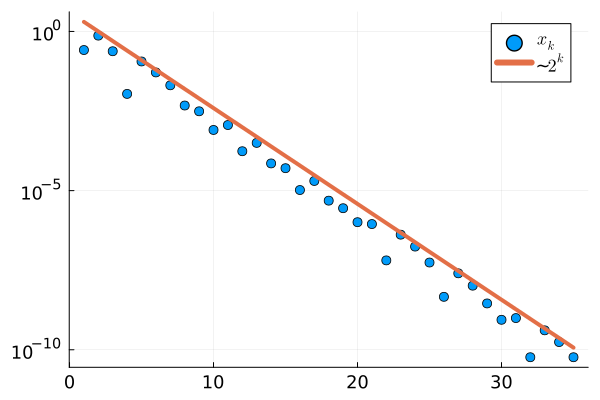

In [2]:
hist = bisect_iter(f, -1, 3, 1e-10)
r = hist[end] # What are we trusting?

hist = hist[1:end-1]
scatter( abs.(hist .- r), yscale=:log10, label="\$x_k\$")

ks = 1:length(hist)
plot!(ks, 4 * (.5 .^ ks), label = "~\$2^k\$")

## Newton-Raphson method

Much of the numerical analysis reduces to [Taylor series](https://en.wikipedia.org/wiki/Taylor_series), the approximation

$$ f \left( x \right) = f \left( x_0 \right) + f' \left( x_0 \right) \left( x - x_0 \right) + f'' \left( x_0 \right) \left( x - x_0 \right)^2 / 2 + \cdots $$

centered on some referece point $x_0$.

In numerical computation, it is exceedingly rare to look beyond the first-order approximation

$$ \tilde{f}_{x_0} \left( x \right) = f \left( x_0 \right) + f' \left( x_0 \right) \left( x - x_0 \right) $$

Since $\tilde{f}_{x_0} \left( x \right)$ is a linear function, we can explicitly compute the unique solution of $\tilde{f}_{x_0} \left( x \right) = 0$ as

$$ x = x_0 - \frac{f \left( x_0 \right)}{f' \left( x \right)} $$

This is Newton's Method (aka Newton-Raphson or Newton-Raphson-Simpson) for finding the roots of differentiable functions.

### An implementation

In [3]:
using Printf

function newton(f, fp, x0; tol=1e-8, verbose=false)
    x = x0
    for k in 1:100 # max number of iterations
        fx = f(x)
        fpx = fp(x)
        if verbose
            println("k=$k, x_k=$(@sprintf("%.16f", x)), f_k=$(@sprintf("%.16e", fx))")
        end
        if abs(fx) < tol
            return x, fx, k
        end
        x = x - fx / fpx
    end  
end

f(x) = cos(x) - x
fp(x) = -sin(x) - 1
newton(f, fp, 1; tol=1e-15, verbose=true)


k=1, x_k=1.0000000000000000, f_k=-4.5969769413186023e-01
k=2, x_k=0.7503638678402439, f_k=-1.8923073822117442e-02
k=3, x_k=0.7391128909113617, f_k=-4.6455898990771516e-05
k=4, x_k=0.7390851333852840, f_k=-2.8472058044570758e-10
k=5, x_k=0.7390851332151607, f_k=0.0000000000000000e+00


(0.7390851332151607, 0.0, 5)

That's fast convergence!

* 10 digits of accuracy in 4 iterations

* How is this convergence test different than the one for bisection?

* How can Newton's method break down?

$$ x_{k + 1} = x_k - \frac{f \left( x_k \right)}{f' \left( x_k \right)} $$

In [4]:
newton(f, fp, -pi/2+.1; verbose=true)

k=1, x_k=-1.4707963267948965, f_k=1.5706297434417247e+00
k=2, x_k=312.9170549232223948, f_k=-3.1259435002533314e+02
k=3, x_k=-5529.9275427528937144, f_k=5.5306763919178247e+03
k=4, x_k=10868.9459369702435652, f_k=-1.0868376227850798e+04
k=5, x_k=-50136.7073225235581049, f_k=5.0135707777419018e+04
k=6, x_k=-1468.7903453577164328, f_k=1.4688859787856973e+03
k=7, x_k=-732.6603742863298976, f_k=7.3187610943622951e+02
k=8, x_k=-281.0038172368655864, f_k=2.8083589138981239e+02
k=9, x_k=-139.5817486699348819, f_k=1.3979912372811944e+02
k=10, x_k=5706.8561562109989609, f_k=-5.7070086597647050e+03
k=11, x_k=2836.5648158265976235, f_k=-2.8375220962814674e+03
k=12, x_k=635.5038791777569713, f_k=-6.3488396511814790e+02
k=13, x_k=279.7607629875441830, f_k=-2.8074814643252921e+02
k=14, x_k=-53.8070079658355667, f_k=5.2885920826340048e+01
k=15, x_k=-15.7419606182276794, f_k=1.4742538472479499e+01
k=16, x_k=-1.4840596284124175, f_k=1.5706876106501757e+00
k=17, x_k=416.3331582875110257, f_k=-4.16405227

(0.7390851332151608, -2.220446049250313e-16, 24)

## Convergence of fixed-point methods (mean value theorem)

Consider the iteration

$$ x_{k + 1} = g \left( x_k \right) $$

where $g$ is a continuously differentiable function.
Suppose that there exists a fixed point $x_* = g \left( x_* \right)$.
By the [mean value theorem](https://en.wikipedia.org/wiki/Mean_value_theorem), we have that

$$ x_{k + 1} - x_* = g \left( x_k \right) - g \left( x_* \right) = g' \left( c_k \right) \left( x_k - x_* \right) $$

for some $c_i$ between $x_k$ and $x_*$.

Taking absolute values,

$$ \left\lvert e_{k + 1} \right\rvert = \left\lvert g' \left( c_k \right) \right\rvert \left\lvert e_k \right\rvert $$

which converges to zero if $\left\lvert g' \left( c_k \right) \right\rvert < 1$.

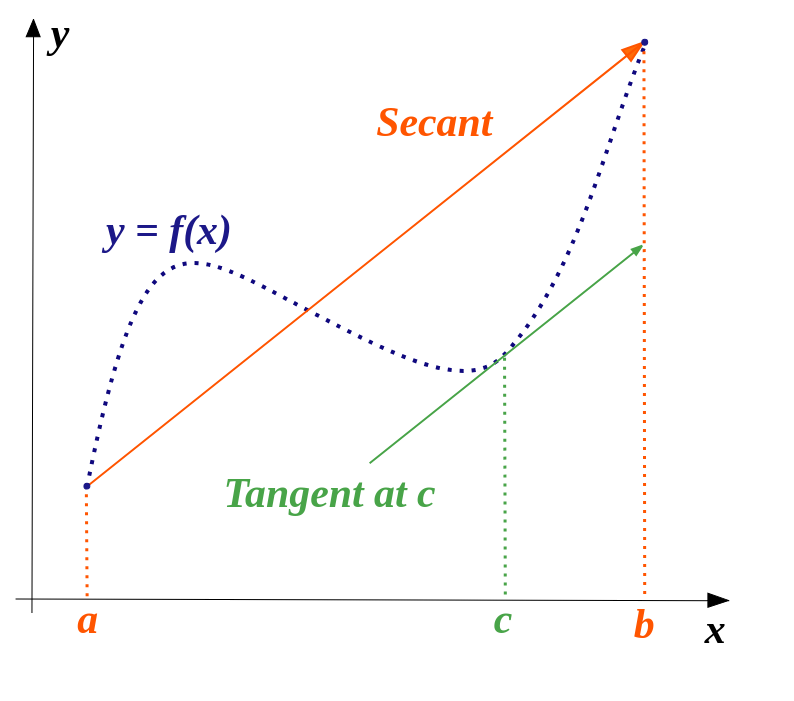

### Convergence of fixed-point methods (Taylor series)

Consider the iteration

$$ x_{k + 1} = g \left( x_k \right) $$

where $g$ is a continuously differentiable function.
Suppose there exists a fixed point $x_* = g \left( x_* \right)$.
there exists a Taylor series at $x_*$,

$$ g \left( x_k \right) = g \left( x_* \right) + g' \left( x_* \right) \left( x_k - x_* \right) + \mathcal{O} \left( \left( x_k - x_* \right)^2 \right) $$

and thus

$$ x_{k + 1} - x_* = g \left( x_k \right) - g \left( x_* \right) = g' \left( x_* \right) \left( x_k - x_* \right) + \mathcal{O} \left( \left( x_k - x_* \right)^2 \right) $$

In terms of the error $e_k = x_k - x_*$,

$$ \left\lvert \frac{e_{k + 1}}{e_k} \right\rvert = \left\lvert g' \left( x_* \right) \right\rvert + \mathcal{O} \left( e_k \right) $$

### Convergence class

Is Newton's method

a) $q$-linearly convergent

b) $r$-linearly convergent

c) neither

## [Big $\mathcal{O}$ notation](https://en.wikipedia.org/wiki/Big_O_notation)

### Limit $n \rightarrow \infty$

We’d say an algorithm costs $\mathcal{O} \left( n^2 \right)$ if its running time on input of size $n$ is less than $c n^2$ for some constant $c$ and sufficiently large $n$.

Sometimes we write $\text{cost} \left( \text{algorithm} \right), n = \mathcal{O} \left( n^2 \right)$ or (preferably) $\text{cost} \left( \text{algorithm} \right) \in \mathcal{O} \left( n^2 \right)$.

Note that $\mathcal{O} \left( \log \left( n \right) \right) \subset \mathcal{O} \left( n \right) \subset \mathcal{O} \left( n \log \left( n \right) \right) \subset \mathcal{O} \left( n^2 \right) \subset \cdots$ so it’s correct to say "binary search is in $\mathcal{O} \left( n^2 \right)$", even though a sharper statement is also true.

We say the algorithm is in $\mathcal{\Omega} \left( n^2 \right)$ (“big theta”) if

$$ c_1 n^2 < \text{cost} \left( \text{algorithm} \right) < c_2 n^2 $$

for some positive constants $c_1, c_2$ and sufficiently large $n$.

### Limit $h \rightarrow 0$

In numerical analysis, we often have a small real number, and now the definitions take the limit as the small number goes to zero.
So we say a term in an expression is in $\mathcal{O} \left( h^2 \right)$ if

$$ \lim_{h \rightarrow \infty} \frac{\text{term} \left( h \right)}{h^2} < \infty $$

Big $\mathcal{O}$ terms can be manipulated as

$$ h \mathcal{O} \left( h^k \right) = \mathcal{O} \left( h^{k + 1} \right) $$
$$ \mathcal{O} \left( h^k \right) / h = \mathcal{O} \left( h^{k - 1} \right) $$
$$ c \mathcal{O} \left( h^k \right) = \mathcal{O} \left( h^k \right) $$
$$ \mathcal{O} \left( h^k \right) - \mathcal{O} \left( h^k \right) = ? $$

## Fixed point iteration example

We wanted to solve $\cos \left( x \right) - x = 0$, which occurs when $g \left( k \right) = \cos \left( x \right)$ is a fixed point.

xstar = 0.739085133385284
gp(xstar) = -0.6736120293089505


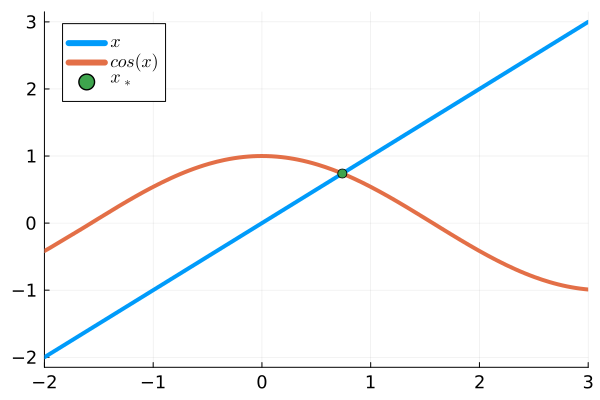

In [5]:
xstar, _ = newton(f, fp, 1.)

g(x) = cos(x)
gp(x) = -sin(x)

@show xstar
@show gp(xstar)

plot([x->x, g], xlims=(-2, 3), label=["\$x\$" "\$cos (x)\$"])
scatter!([xstar], [xstar],
    label="\$x_*\$")

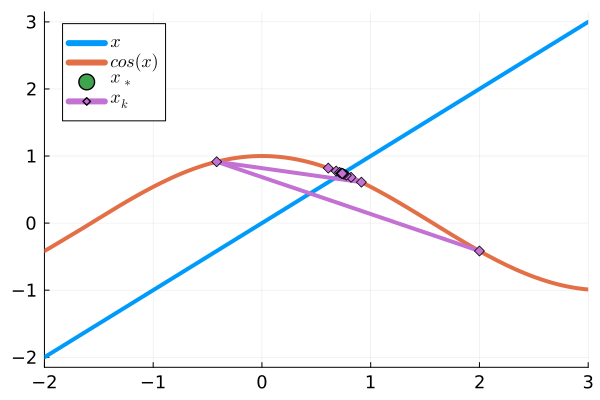

In [6]:
function fixed_point(g, x, n)
    xs = [x]
    for k in 1:n
        x = g(x)
        append!(xs, x)
    end
    xs
end

xs = fixed_point(g, 2., 15)
plot!(xs, g.(xs), seriestype=:path, marker=:auto, label="\$x_k\$")

## Verifying fixed point convergence theory

$$ \left\lvert \frac{e_{k + 1}}{e_k} \right\rvert \rightarrow \left\lvert g' \left( x_* \right) \right\rvert $$

In [7]:
@show gp(xstar)
es = xs .- xstar
es[2:end] ./ es[1:end-1]

gp(xstar) = -0.6736120293089505


15-element Vector{Float64}:
 -0.9161855415615605
 -0.15197657010596488
 -0.734870205299266
 -0.624132525531327
 -0.7026257933893496
 -0.6523498121376077
 -0.6870971782336925
 -0.664168570025122
 -0.6798044680427148
 -0.6693659427636027
 -0.6764378047956165
 -0.6716930541785153
 -0.6748976495459512
 -0.6727427617641084
 -0.6741962236114177

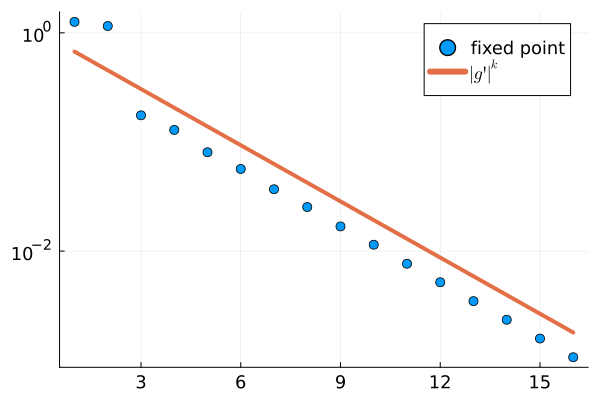

In [8]:
scatter(abs.(es), yscale=:log10, label="fixed point")
plot!(k -> abs(gp(xstar))^k, label="\$|g'|^k\$")

## Plotting Newton convergence

In [9]:
function newton_hist(f, fp, x0; tol=1e-12)
    x = x0
    hist = []
    for k in 1:100 # max number of iterations
        fx = f(x)
        fpx = fp(x)
        push!(hist, [x fx fpx])
        if abs(fx) < tol
            return vcat(hist...)
        end
        x = x - fx / fpx
    end
end

newton_hist (generic function with 1 method)

x_star = xs[end, 1] = 0.7390851332151607


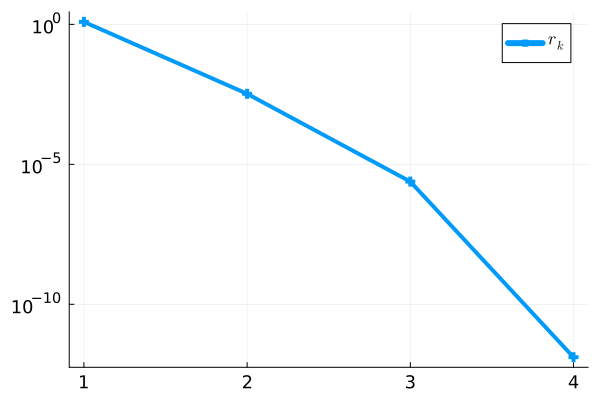

In [10]:
xs = newton_hist(f, fp, 1.97)
@show x_star = xs[end,1]

plot(xs[1:end-1,1] .- x_star, yscale=:log10, marker=:auto, label="\$r_k\$")

### Convergence class

Is Newton's method

a) $q$-linearly convergent

b) $r$-linearly convergent

c) neither

### Formulations are not unique (constants)

If $x = g \left( x \right)$ then

$$ x = x + c \left( g \left( x \right) - x \right) = g_2 \left( x \right) $$

for any constant $c \neq 0$.
Can we choose $c$ to make $\left\lvert g'_2 \left( x_* \right) \right\rvert$ small?

g2p(xstar) = 0.16319398534552476


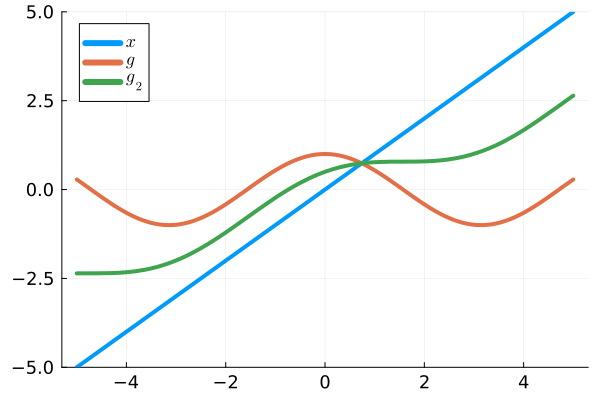

In [11]:
c = .5
g2(x) = x + c * (cos(x) - x)
g2p(x) = 1 + c * (-sin(x) - 1)

@show g2p(xstar)

plot([x->x, g, g2], ylims=(-5, 5), label=["\$x\$" "\$g\$" "\$g_2\$"])

In [12]:
xs = fixed_point(g2, 1., 15)
xs .- xstar

16-element Vector{Float64}:
  0.26091486661471597
  0.03106601954878585
  0.004893162344945079
  0.0007941171212053622
  0.00012947850276123773
  2.112687301181193e-5
  3.4475537732392425e-6
  5.62475483634195e-7
  9.16501970982253e-8
  1.4814399151852342e-8
  2.2752605355336186e-9
  2.2894852680366284e-10
 -1.0499723313017739e-10
 -1.594951948291623e-10
 -1.683889694348295e-10
 -1.6984036399492197e-10

### Formulations are not unique (functions)

If $x = g \left( x \right)$ then

$$ x = x + h \left( x \right) \left( g \left( x \right) - x \right) = g_3 \left( x \right) $$

for any smooth $h \left( x \right) \neq 0$.
Can we choose $h \left( x \right)$ to make $\left\lvert g'_3 \left( x \right) \right\rvert$ small?

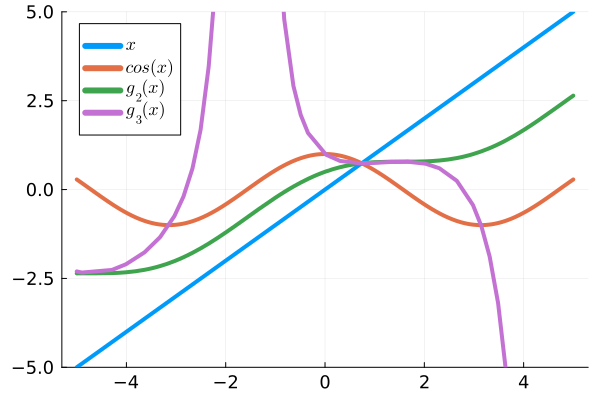

In [13]:
h(x) = -1 / (gp(x) - 1)
g3(x) = x + h(x) * (g(x) - x)
plot([x -> x, cos, g2, g3], ylims=(-5, 5), label=["\$x\$" "\$cos (x)\$" "\$g_2 (x)\$" "\$g_3 (x)\$"])

* We don't know $g' \left( x_* \right)$ in advance because we don't know $x_*$

* This method converges fast

* We just re-derived Newton's method

## Newton's method - a new derivation

A rootfinding problem $f \left( x \right) = 0$ can be converted to a fixed point problem

$$ x = x + f \left( x \right) := g \left( x \right) $$

but there is no guarantee that $g' \left( x_* \right) = 1 + f' \left( x_* \right)$ will have magnitude less than 1.

Problem-specific algebraic manipulation can be used to make $\left\lvert g' \left( x_* \right) \right\rvert$ small.

$x = x + h \left( x \right) f \left( x \right)$ is also a valid formulation for any $h \left( x \right)$ bounded away from $0$.

Can we choose $h \left( x \right)$ such that

$$ g' \left( x \right) 1 + h' \left( x \right) f \left( x \right) + h \left( x \right) f' \left( x \right) = 0$$

when $f \left( x \right) = 0$?

In other words,

$$ x_{k + 1} = x_k + \frac{-1}{f' \left( x_k \right)} f \left( x_k \right) = x_k + h \left( h_k \right) f \left( x_k \right) $$

### Quadratic convergence

$$ \left\lvert \frac{e_{k + 1}}{e_k} \right\rvert \rightarrow \left\lvert g' \left( x_* \right) \right\rvert $$

* What does it mean that $g' \left( x_* \right) = 0$?

* It turns out that Newton's method has **locally quadratic$$ conevgence to simple roots,

$$ \lim_{k \rightarrow \infty} \frac{\left\lvert e_{k + 1} \right\rvert}{\left\lvert e_k \right\rvert^2} < \infty $$

* "The number of correct digits doubles each iteration"

* Now that we know how to make a good guess accurate, the hard part is getting a good guess

## Sidebar - Fast inverse square root

The following code appeared literally (with these comments) in the Quake III Arena source code (late 1990s).

```C
float Q_rsqrt( float number )
{
	long i;
	float x2, y;
	const float threehalfs = 1.5F;

	x2 = number * 0.5F;
	y  = number;
	i  = * ( long * ) &y;                     // evil floating point bit level hacking
	i  = 0x5f3759df - ( i >> 1 );             // what the fuck? 
	y  = * ( float * ) &i;
    y  = y * ( threehalfs - ( x2 * y * y ) ); // 1st iteration
//  y  = y * ( threehalfs - ( x2 * y * y ) ); // 2nd iteration, this can be removed

	return y;
}
```

We now have [vector instructions](https://software.intel.com/sites/landingpage/IntrinsicsGuide/#text=rsqrt&expand=2989,1224,4470) for approximate inverse square root.
See also [Wikipedia](https://en.wikipedia.org/wiki/Fast_inverse_square_root).

### How does it work?

Let's look at the last line.

```C
y  = y * ( threehalfs - ( x2 * y * y ) );   // 1st iteration
```

We want a function $f \left( y \right)$ such that $f \left( 1 / \sqrt{x} \right) = 0$.
One such function is

$$ f \left( y \right) = 1 / y^2 - x, f' \left( y \right) = -2 / y^3 $$

There are others (see the homework activity) that require a division.

Newton's method is

$$ \begin{align} y_{k + 1} &= y_k - \frac{f \left( y_k \right)}{f' \left( y_k \right)}\\
                           &= y_k - \frac{ 1 / y_k^2 - x}{-2 / y_k^3}\\
                           &= y_k + \frac{1}{2} \left( y_k - x y_k^2 \right)\\
                           &= y_k \left( \frac{3}{2} - \frac{1}{2} x f_k^2 \right)
\end{align} $$